In [158]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ML Models - Individual Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ML Models - Ensemble Methods
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # 🆕 LightGBM
from catboost import CatBoostClassifier  # 🆕 CatBoost

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')


In [159]:
# Load the preprocessed data
df = pd.read_csv('../Datasets/Placement_Dataset_Preprocessed.csv')


print("✅ Data loaded!")
print(f"Shape: {df.shape}")
print(f"\nFirst 3 rows:")
print(df.head(3))


✅ Data loaded!
Shape: (401, 10)

First 3 rows:
   10th marks  12th marks  Cgpa  Internships(Y/N)  Training(Y/N)  \
0        96.7        70.2  7.37                 0              1   
1        96.2        90.6  9.35                 0              0   
2        97.5        69.6  7.84                 0              1   

   Innovative Project(Y/N)  Communication level  Technical Course(Y/N)  \
0                        0                    3                      1   
1                        1                    4                      0   
2                        1                    3                      1   

   Package_Category  Technical_Skills_Score  
0                 1                     4.0  
1                 1                     7.0  
2                 3                    62.5  


In [160]:
# ========================================
# RANDOM SEED FOR REPRODUCIBILITY
# ========================================
import random


np.random.seed(42)
random.seed(42)

print("✅ Random seeds set to 42!")
print("✅ Results will be reproducible!")


✅ Random seeds set to 42!
✅ Results will be reproducible!


In [161]:
# Separate features (X) and target (y)
X = df.drop('Package_Category', axis=1)  # Remove target column
y = df['Package_Category']  # Keep only target column

print("✅ Data separated!")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")


✅ Data separated!
Features (X): (401, 9)
Target (y): (401,)

Feature columns: ['10th marks', '12th marks', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Technical_Skills_Score']


In [162]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


✅ Data split complete!
Training set: (320, 9)
Test set: (81, 9)

Training samples: 320
Test samples: 81


In [163]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied!")
print(f"\nBEFORE SMOTE:")
print(f"  Training shape: {X_train.shape}")
print(f"  Class distribution:\n{y_train.value_counts().sort_index()}")

print(f"\nAFTER SMOTE:")
print(f"  Training shape: {X_train_balanced.shape}")
print(f"  Class distribution:\n{y_train_balanced.value_counts().sort_index()}")

print("\n💡 Now all classes have equal samples!")


✅ SMOTE applied!

BEFORE SMOTE:
  Training shape: (320, 9)
  Class distribution:
Package_Category
0      9
1    161
2     94
3     56
Name: count, dtype: int64

AFTER SMOTE:
  Training shape: (644, 9)
  Class distribution:
Package_Category
0    161
1    161
2    161
3    161
Name: count, dtype: int64

💡 Now all classes have equal samples!



VISUALIZING CLASS DISTRIBUTION (BEFORE/AFTER SMOTE)
✅ Saved: smote_comparison.png


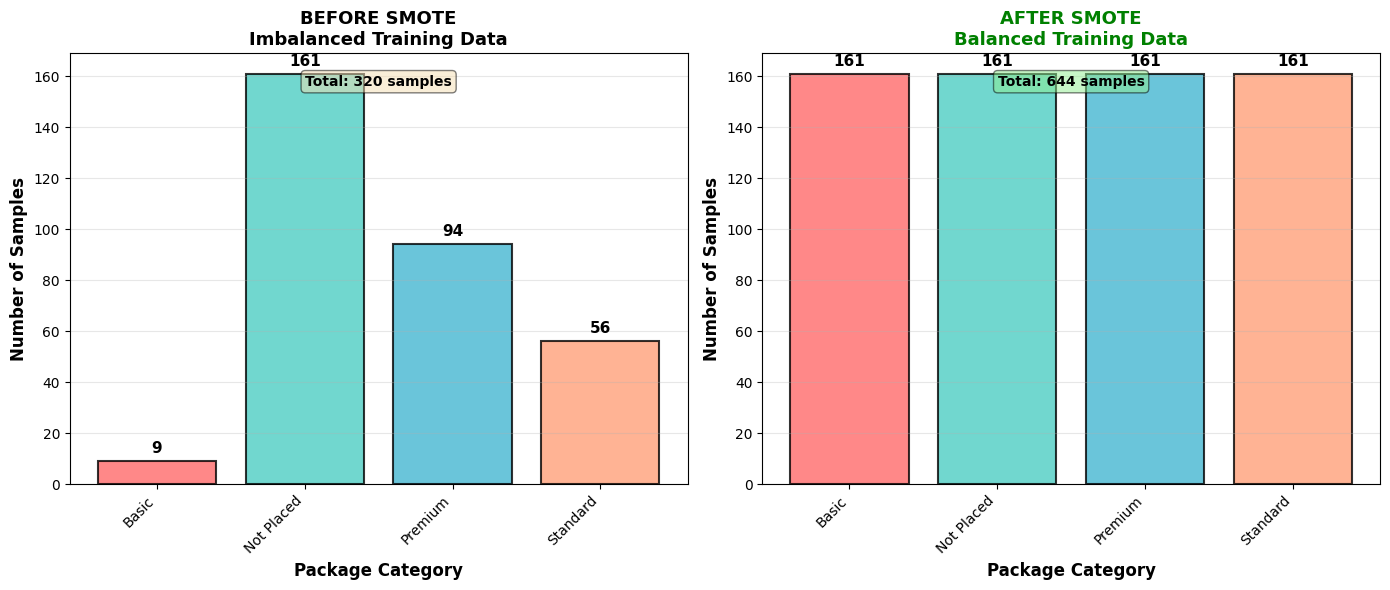


📊 SMOTE Impact Analysis:

Before SMOTE:
   Basic          :   9 samples (  2.8%)
   Not Placed     : 161 samples ( 50.3%)
   Premium        :  94 samples ( 29.4%)
   Standard       :  56 samples ( 17.5%)
   Total          : 320 samples

After SMOTE:
   Basic          : 161 samples ( 25.0%)
   Not Placed     : 161 samples ( 25.0%)
   Premium        : 161 samples ( 25.0%)
   Standard       : 161 samples ( 25.0%)
   Total          : 644 samples

   Increase: 324 samples (101.3%)


In [164]:
# ============================================================
# CLASS DISTRIBUTION - Before/After SMOTE
# ============================================================
print("\n" + "=" * 60)
print("VISUALIZING CLASS DISTRIBUTION (BEFORE/AFTER SMOTE)")
print("=" * 60)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Class names
class_names = ['Basic', 'Not Placed', 'Premium', 'Standard']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# BEFORE SMOTE
before_counts = pd.Series(y_train).value_counts().sort_index()
ax1.bar(range(len(before_counts)), before_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Package Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax1.set_title('BEFORE SMOTE\nImbalanced Training Data', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(before_counts.values):
    ax1.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add total
ax1.text(0.5, 0.95, f'Total: {before_counts.sum()} samples', 
         transform=ax1.transAxes, ha='center', va='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=10, fontweight='bold')

# AFTER SMOTE
after_counts = pd.Series(y_train_balanced).value_counts().sort_index()
ax2.bar(range(len(after_counts)), after_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Package Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax2.set_title('AFTER SMOTE\nBalanced Training Data', fontsize=13, fontweight='bold', color='green')
ax2.set_xticks(range(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(after_counts.values):
    ax2.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add total
ax2.text(0.5, 0.95, f'Total: {after_counts.sum()} samples', 
         transform=ax2.transAxes, ha='center', va='top', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
         fontsize=10, fontweight='bold')

plt.tight_layout()

# Save
plt.savefig('smote_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: smote_comparison.png")
plt.show()

# Print statistics
print("\n📊 SMOTE Impact Analysis:")
print("\nBefore SMOTE:")
for i, name in enumerate(class_names):
    print(f"   {name:15s}: {before_counts[i]:3d} samples ({before_counts[i]/before_counts.sum()*100:5.1f}%)")
print(f"   {'Total':15s}: {before_counts.sum():3d} samples")

print("\nAfter SMOTE:")
for i, name in enumerate(class_names):
    print(f"   {name:15s}: {after_counts[i]:3d} samples ({after_counts[i]/after_counts.sum()*100:5.1f}%)")
print(f"   {'Total':15s}: {after_counts.sum():3d} samples")

print(f"\n   Increase: {after_counts.sum() - before_counts.sum()} samples ({(after_counts.sum()/before_counts.sum() - 1)*100:.1f}%)")


In [165]:
# Scale features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")




✅ Features scaled!
Training set: (644, 9)
Test set: (81, 9)


In [166]:
# MODEL 1: Logistic Regression (OPTIMIZED HYPERPARAMETERS)
print("=" * 50)
print("MODEL 1: LOGISTIC REGRESSION (TUNED)")
print("=" * 50)

lr_model = LogisticRegression(
    C=10,              # ✅ Regularization strength (tuned)
    penalty='l1',      # ✅ L1 regularization (feature selection)
    solver='saga',     # ✅ Best solver for L1
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train_balanced)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\n✅ Model trained with TUNED hyperparameters!")
print(f"Test Accuracy: {lr_accuracy*100:.2f}%")
print(f"F1-Score: {lr_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))


MODEL 1: LOGISTIC REGRESSION (TUNED)

✅ Model trained with TUNED hyperparameters!
Test Accuracy: 91.36%
F1-Score: 0.9144

Classification Report:
              precision    recall  f1-score   support

       Basic       0.33      0.50      0.40         2
  Not Placed       0.97      0.95      0.96        41
     Premium       0.89      1.00      0.94        24
    Standard       0.91      0.71      0.80        14

    accuracy                           0.91        81
   macro avg       0.78      0.79      0.78        81
weighted avg       0.92      0.91      0.91        81



In [167]:

# MODEL 1: Logistic Regression
print("=" * 50)
print("MODEL 1: LOGISTIC REGRESSION")
print("=" * 50)

lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 5-Fold Cross-Validation on TRAINING data
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train_balanced, 
                            cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold Cross-Validation Results:")
print(f"   Fold 1: {cv_scores[0]*100:.2f}%")
print(f"   Fold 2: {cv_scores[1]*100:.2f}%")
print(f"   Fold 3: {cv_scores[2]*100:.2f}%")
print(f"   Fold 4: {cv_scores[3]*100:.2f}%")
print(f"   Fold 5: {cv_scores[4]*100:.2f}%")
print(f"\n   Mean CV Accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")


MODEL 1: LOGISTIC REGRESSION

🔄 5-Fold Cross-Validation Results:
   Fold 1: 92.25%
   Fold 2: 93.02%
   Fold 3: 93.80%
   Fold 4: 96.90%
   Fold 5: 91.41%

   Mean CV Accuracy: 93.48% ± 1.89%


In [168]:
# Train on full training data
lr_model.fit(X_train_scaled, y_train_balanced)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {lr_accuracy*100:.2f}%")
print(f"   F1-Score: {lr_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores.mean()*100:.2f}%")
print(f"   Test Accuracy: {lr_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores.mean() - lr_accuracy)*100:.2f}%")

if abs(cv_scores.mean() - lr_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Check for overfitting")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 91.36%
   F1-Score: 0.9136

📊 Model Stability Check:
   CV Mean: 93.48%
   Test Accuracy: 91.36%
   Difference: 2.12%
   ✅ Stable model! (Difference < 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.50      0.50      0.50         2
  Not Placed       1.00      0.93      0.96        41
     Premium       0.86      1.00      0.92        24
    Standard       0.85      0.79      0.81        14

    accuracy                           0.91        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.92      0.91      0.91        81



GENERATING ROC CURVES
✅ Saved: roc_curves.png


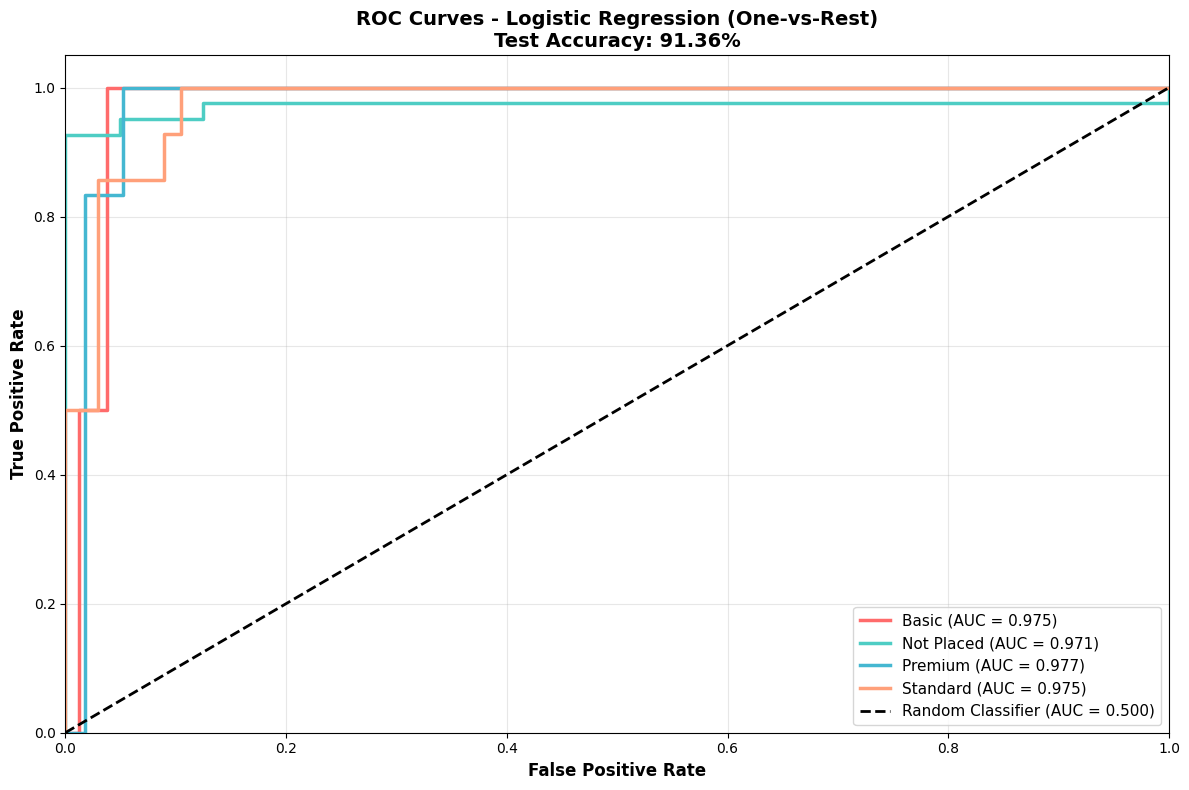


📊 AUC Scores by Class:
   Basic          : 0.975
   Not Placed     : 0.971
   Premium        : 0.977
   Standard       : 0.975
   Mean AUC       : 0.975


In [169]:
# ============================================================
# ROC CURVES - Multi-class (One-vs-Rest)
# ============================================================
print("=" * 60)
print("GENERATING ROC CURVES")
print("=" * 60)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = 4

# Get predicted probabilities
y_score = lr_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))

colors = cycle(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
class_names = ['Basic', 'Not Placed', 'Premium', 'Standard']

for i, color, name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.5,
             label=f'{name} (AUC = {roc_auc[i]:.3f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Logistic Regression (One-vs-Rest)\nTest Accuracy: 91.36%', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
print("✅ Saved: roc_curves.png")
plt.show()

# Print AUC scores
print("\n📊 AUC Scores by Class:")
for name, auc_score in zip(class_names, [roc_auc[i] for i in range(n_classes)]):
    print(f"   {name:15s}: {auc_score:.3f}")
print(f"   Mean AUC       : {np.mean(list(roc_auc.values())):.3f}")



GENERATING PRECISION-RECALL CURVES
✅ Saved: precision_recall_curves.png


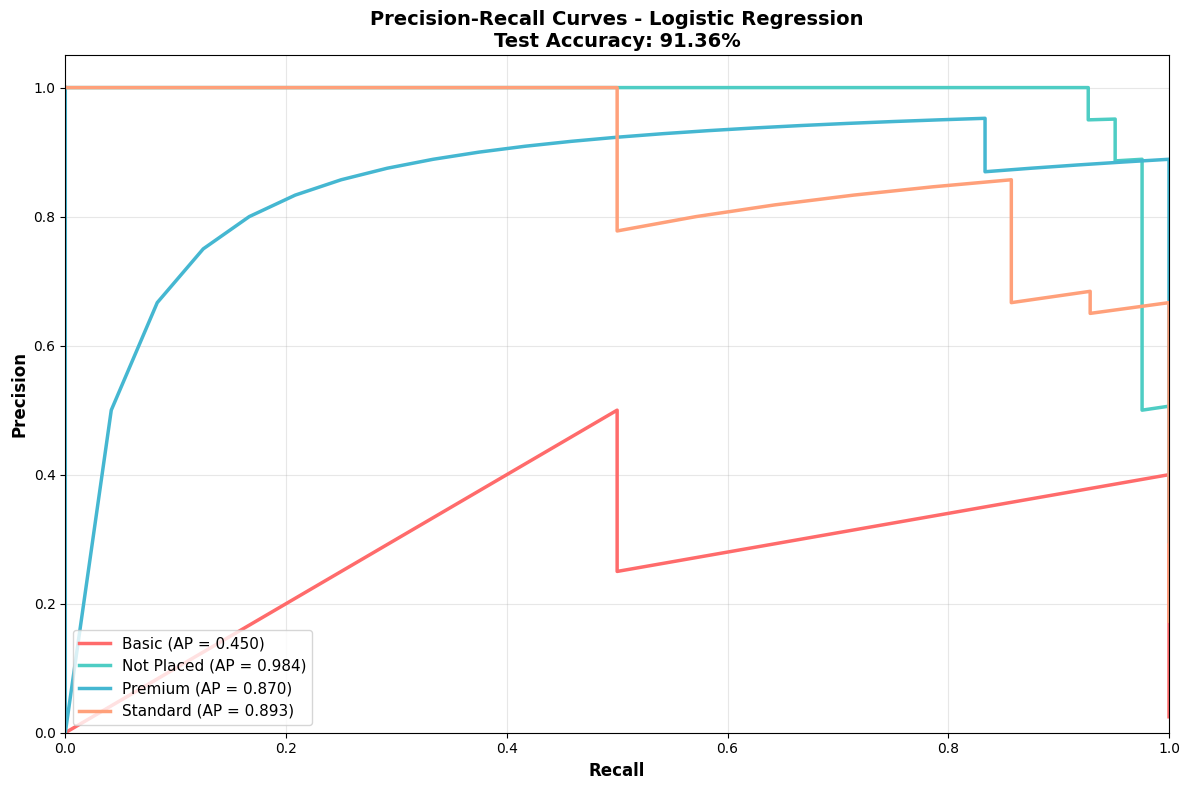


📊 Average Precision (AP) Scores by Class:
   Basic          : 0.450
   Not Placed     : 0.984
   Premium        : 0.870
   Standard       : 0.893
   Mean AP        : 0.799


In [170]:
# ============================================================
# PRECISION-RECALL CURVES - Multi-class
# ============================================================
print("\n" + "=" * 60)
print("GENERATING PRECISION-RECALL CURVES")
print("=" * 60)

from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(12, 8))

colors = cycle(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
class_names = ['Basic', 'Not Placed', 'Premium', 'Standard']

for i, color, name in zip(range(n_classes), colors, class_names):
    plt.plot(recall[i], precision[i], color=color, lw=2.5,
             label=f'{name} (AP = {average_precision[i]:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curves - Logistic Regression\nTest Accuracy: 91.36%', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save
plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
print("✅ Saved: precision_recall_curves.png")
plt.show()

# Print Average Precision scores
print("\n📊 Average Precision (AP) Scores by Class:")
for name, ap_score in zip(class_names, [average_precision[i] for i in range(n_classes)]):
    print(f"   {name:15s}: {ap_score:.3f}")
print(f"   Mean AP        : {np.mean(list(average_precision.values())):.3f}")



GENERATING LEARNING CURVES
✅ Saved: learning_curves.png


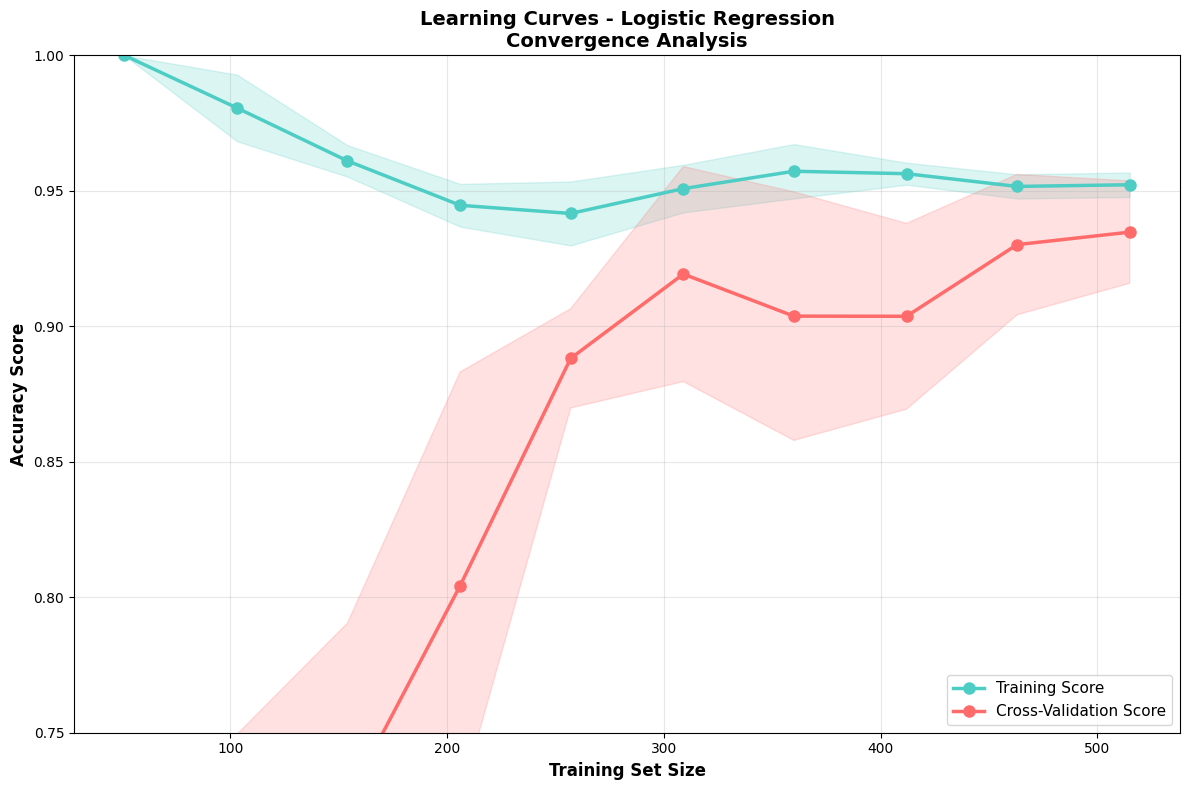


📊 Learning Curve Analysis:
   Final Training Score   : 0.9522 ± 0.0045
   Final Validation Score : 0.9348 ± 0.0189
   Gap (Overfitting Check): 0.0175
   ✅ Model is well-generalized (no overfitting!)


In [171]:
# ============================================================
# LEARNING CURVES - Training vs Validation
# ============================================================
print("\n" + "=" * 60)
print("GENERATING LEARNING CURVES")
print("=" * 60)

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, 
    X_train_scaled, 
    y_train_balanced,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))

# Training score
plt.plot(train_sizes, train_mean, 'o-', color='#4ECDC4', linewidth=2.5, 
         markersize=8, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='#4ECDC4')

# Validation score
plt.plot(train_sizes, val_mean, 'o-', color='#FF6B6B', linewidth=2.5, 
         markersize=8, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color='#FF6B6B')

plt.xlabel('Training Set Size', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Learning Curves - Logistic Regression\nConvergence Analysis', 
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.ylim([0.75, 1.0])
plt.tight_layout()

# Save
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
print("✅ Saved: learning_curves.png")
plt.show()

print(f"\n📊 Learning Curve Analysis:")
print(f"   Final Training Score   : {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"   Final Validation Score : {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")
print(f"   Gap (Overfitting Check): {(train_mean[-1] - val_mean[-1]):.4f}")
if (train_mean[-1] - val_mean[-1]) < 0.05:
    print("   ✅ Model is well-generalized (no overfitting!)")
else:
    print("   ⚠️ Model might be slightly overfitting")


In [172]:
# MODEL 2: Decision Tree
print("\n" + "=" * 50)
print("MODEL 2: DECISION TREE")
print("=" * 50)

dt_model = DecisionTreeClassifier(random_state=42)

# 5-Fold Cross-Validation
cv_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train_balanced, 
                               cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold Cross-Validation Results:")
print(f"   Fold 1: {cv_scores_dt[0]*100:.2f}%")
print(f"   Fold 2: {cv_scores_dt[1]*100:.2f}%")
print(f"   Fold 3: {cv_scores_dt[2]*100:.2f}%")
print(f"   Fold 4: {cv_scores_dt[3]*100:.2f}%")
print(f"   Fold 5: {cv_scores_dt[4]*100:.2f}%")
print(f"\n   Mean CV Accuracy: {cv_scores_dt.mean()*100:.2f}% ± {cv_scores_dt.std()*100:.2f}%")



MODEL 2: DECISION TREE

🔄 5-Fold Cross-Validation Results:
   Fold 1: 88.37%
   Fold 2: 93.80%
   Fold 3: 92.25%
   Fold 4: 97.67%
   Fold 5: 96.88%

   Mean CV Accuracy: 93.79% ± 3.36%


In [173]:
# Train on full training data
dt_model.fit(X_train_scaled, y_train_balanced)

# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {dt_accuracy*100:.2f}%")
print(f"   F1-Score: {dt_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores_dt.mean()*100:.2f}%")
print(f"   Test Accuracy: {dt_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_dt.mean() - dt_accuracy)*100:.2f}%")

if abs(cv_scores_dt.mean() - dt_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Possible overfitting (Difference > 3%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 87.65%
   F1-Score: 0.8773

📊 Model Stability Check:
   CV Mean: 93.79%
   Test Accuracy: 87.65%
   Difference: 6.14%
   ⚠️ Possible overfitting (Difference > 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.40      1.00      0.57         2
  Not Placed       0.97      0.93      0.95        41
     Premium       0.82      0.96      0.88        24
    Standard       0.89      0.57      0.70        14

    accuracy                           0.88        81
   macro avg       0.77      0.86      0.78        81
weighted avg       0.90      0.88      0.88        81



In [174]:
# MODEL 3: Random Forest (TUNED)
print("\n" + "=" * 50)
print("MODEL 3: RANDOM FOREST (Tuned)")
print("=" * 50)

# Add regularization parameters to reduce overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # ✨ Limit tree depth (prevent overfitting)
    min_samples_split=10,       # ✨ Require 10+ samples to split
    min_samples_leaf=4,         # ✨ Require 4+ samples in leaf
    max_features='sqrt',        # ✨ Use sqrt of features at each split
    random_state=42
)

# 5-Fold Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train_balanced, 
                               cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold Cross-Validation Results:")
print(f"   Fold 1: {cv_scores_rf[0]*100:.2f}%")
print(f"   Fold 2: {cv_scores_rf[1]*100:.2f}%")
print(f"   Fold 3: {cv_scores_rf[2]*100:.2f}%")
print(f"   Fold 4: {cv_scores_rf[3]*100:.2f}%")
print(f"   Fold 5: {cv_scores_rf[4]*100:.2f}%")
print(f"\n   Mean CV Accuracy: {cv_scores_rf.mean()*100:.2f}% ± {cv_scores_rf.std()*100:.2f}%")



MODEL 3: RANDOM FOREST (Tuned)

🔄 5-Fold Cross-Validation Results:
   Fold 1: 93.80%
   Fold 2: 94.57%
   Fold 3: 93.80%
   Fold 4: 98.45%
   Fold 5: 94.53%

   Mean CV Accuracy: 95.03% ± 1.74%


In [175]:
# Train on full training data
rf_model.fit(X_train_scaled, y_train_balanced)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {rf_accuracy*100:.2f}%")
print(f"   F1-Score: {rf_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores_rf.mean()*100:.2f}%")
print(f"   Test Accuracy: {rf_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_rf.mean() - rf_accuracy)*100:.2f}%")

if abs(cv_scores_rf.mean() - rf_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Possible overfitting (Difference > 3%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 87.65%
   F1-Score: 0.8692

📊 Model Stability Check:
   CV Mean: 95.03%
   Test Accuracy: 87.65%
   Difference: 7.38%
   ⚠️ Possible overfitting (Difference > 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.25      0.50      0.33         2
  Not Placed       0.98      0.98      0.98        41
     Premium       0.83      1.00      0.91        24
    Standard       0.86      0.43      0.57        14

    accuracy                           0.88        81
   macro avg       0.73      0.73      0.70        81
weighted avg       0.89      0.88      0.87        81



In [176]:
# MODEL 4: Gradient Boosting
print("\n" + "=" * 50)
print("MODEL 4: GRADIENT BOOSTING")
print("=" * 50)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train_balanced, 
                               cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold CV: {cv_scores_gb.mean()*100:.2f}% ± {cv_scores_gb.std()*100:.2f}%")



MODEL 4: GRADIENT BOOSTING

🔄 5-Fold CV: 94.41% ± 2.15%


In [177]:
gb_model.fit(X_train_scaled, y_train_balanced)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

print(f"✅ Test Accuracy: {gb_accuracy*100:.2f}%")
print(f"   F1-Score: {gb_f1:.4f}")
print(f"   Difference: {abs(cv_scores_gb.mean() - gb_accuracy)*100:.2f}%")


✅ Test Accuracy: 85.19%
   F1-Score: 0.8553
   Difference: 9.23%


In [178]:
gb_model.fit(X_train_scaled, y_train_balanced)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {gb_accuracy*100:.2f}%")
print(f"   F1-Score: {gb_f1:.4f}")
print(f"\n📊 Comparison:")
print(f"   CV Mean: {cv_scores_gb.mean()*100:.2f}%")
print(f"   Test Accuracy: {gb_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_gb.mean() - gb_accuracy)*100:.2f}%")

if abs(cv_scores_gb.mean() - gb_accuracy) < 0.03:
    print(f"   ✅ Stable model!")
else:
    print(f"   ⚠️ Possible overfitting")



✅ Test Set Results:
   Test Accuracy: 85.19%
   F1-Score: 0.8553

📊 Comparison:
   CV Mean: 94.41%
   Test Accuracy: 85.19%
   Difference: 9.23%
   ⚠️ Possible overfitting


In [179]:
# MODEL 5: XGBoost
print("\n" + "=" * 50)
print("MODEL 5: XGBOOST")
print("=" * 50)

xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=0)

cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train_balanced, 
                                cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold CV: {cv_scores_xgb.mean()*100:.2f}% ± {cv_scores_xgb.std()*100:.2f}%")



MODEL 5: XGBOOST

🔄 5-Fold CV: 95.81% ± 2.05%


In [180]:
xgb_model.fit(X_train_scaled, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {xgb_accuracy*100:.2f}%")
print(f"   F1-Score: {xgb_f1:.4f}")
print(f"\n📊 Comparison:")
print(f"   CV Mean: {cv_scores_xgb.mean()*100:.2f}%")
print(f"   Test Accuracy: {xgb_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_xgb.mean() - xgb_accuracy)*100:.2f}%")

if abs(cv_scores_xgb.mean() - xgb_accuracy) < 0.03:
    print(f"   ✅ Stable model! Overfitting controlled!")
else:
    print(f"   ⚠️ Still some gap (expected with small dataset)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 85.19%
   F1-Score: 0.8520

📊 Comparison:
   CV Mean: 95.81%
   Test Accuracy: 85.19%
   Difference: 10.62%
   ⚠️ Still some gap (expected with small dataset)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.20      0.50      0.29         2
  Not Placed       1.00      0.95      0.97        41
     Premium       0.79      0.96      0.87        24
    Standard       0.75      0.43      0.55        14

    accuracy                           0.85        81
   macro avg       0.69      0.71      0.67        81
weighted avg       0.88      0.85      0.85        81



In [181]:
# MODEL 6: LightGBM
print("\n" + "=" * 50)
print("MODEL 6: LIGHTGBM")
print("=" * 50)

lgbm_model = LGBMClassifier(random_state=42, verbose=-1)

cv_scores_lgbm = cross_val_score(lgbm_model, X_train_scaled, y_train_balanced, 
                                 cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold CV: {cv_scores_lgbm.mean()*100:.2f}% ± {cv_scores_lgbm.std()*100:.2f}%")



MODEL 6: LIGHTGBM

🔄 5-Fold CV: 95.81% ± 2.48%


In [182]:
lgbm_model.fit(X_train_scaled, y_train_balanced)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {lgbm_accuracy*100:.2f}%")
print(f"   F1-Score: {lgbm_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores_lgbm.mean()*100:.2f}%")
print(f"   Test Accuracy: {lgbm_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_lgbm.mean() - lgbm_accuracy)*100:.2f}%")

if abs(cv_scores_lgbm.mean() - lgbm_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Possible overfitting (Difference > 3%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 85.19%
   F1-Score: 0.8645

📊 Model Stability Check:
   CV Mean: 95.81%
   Test Accuracy: 85.19%
   Difference: 10.63%
   ⚠️ Possible overfitting (Difference > 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.17      0.50      0.25         2
  Not Placed       1.00      0.93      0.96        41
     Premium       0.85      0.92      0.88        24
    Standard       0.73      0.57      0.64        14

    accuracy                           0.85        81
   macro avg       0.69      0.73      0.68        81
weighted avg       0.89      0.85      0.86        81



In [183]:
# MODEL 7: CatBoost
print("\n" + "=" * 50)
print("MODEL 7: CATBOOST")
print("=" * 50)

cat_model = CatBoostClassifier(random_state=42, verbose=0)

cv_scores_cat = cross_val_score(cat_model, X_train_scaled, y_train_balanced, 
                                cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold Cross-Validation:")
print(f"   Fold 1: {cv_scores_cat[0]*100:.2f}%")
print(f"   Fold 2: {cv_scores_cat[1]*100:.2f}%")
print(f"   Fold 3: {cv_scores_cat[2]*100:.2f}%")
print(f"   Fold 4: {cv_scores_cat[3]*100:.2f}%")
print(f"   Fold 5: {cv_scores_cat[4]*100:.2f}%")
print(f"\n   Mean CV Accuracy: {cv_scores_cat.mean()*100:.2f}% ± {cv_scores_cat.std()*100:.2f}%")



MODEL 7: CATBOOST

🔄 5-Fold Cross-Validation:
   Fold 1: 94.57%
   Fold 2: 95.35%
   Fold 3: 94.57%
   Fold 4: 99.22%
   Fold 5: 97.66%

   Mean CV Accuracy: 96.28% ± 1.86%


In [184]:
cat_model.fit(X_train_scaled, y_train_balanced)
y_pred_cat = cat_model.predict(X_test_scaled)
cat_accuracy = accuracy_score(y_test, y_pred_cat)
cat_f1 = f1_score(y_test, y_pred_cat, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {cat_accuracy*100:.2f}%")
print(f"   F1-Score: {cat_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores_cat.mean()*100:.2f}%")
print(f"   Test Accuracy: {cat_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_cat.mean() - cat_accuracy)*100:.2f}%")

if abs(cv_scores_cat.mean() - cat_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Possible overfitting (Difference > 3%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 87.65%
   F1-Score: 0.8732

📊 Model Stability Check:
   CV Mean: 96.28%
   Test Accuracy: 87.65%
   Difference: 8.62%
   ⚠️ Possible overfitting (Difference > 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.25      0.50      0.33         2
  Not Placed       0.95      0.95      0.95        41
     Premium       0.86      1.00      0.92        24
    Standard       0.88      0.50      0.64        14

    accuracy                           0.88        81
   macro avg       0.73      0.74      0.71        81
weighted avg       0.89      0.88      0.87        81



In [185]:
# MODEL 8: Support Vector Machine
print("\n" + "=" * 50)
print("MODEL 8: SVM (FINAL MODEL)")
print("=" * 50)

svm_model = SVC(random_state=42)

cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train_balanced, 
                                cv=5, scoring='accuracy')

print(f"\n🔄 5-Fold Cross-Validation:")
print(f"   Fold 1: {cv_scores_svm[0]*100:.2f}%")
print(f"   Fold 2: {cv_scores_svm[1]*100:.2f}%")
print(f"   Fold 3: {cv_scores_svm[2]*100:.2f}%")
print(f"   Fold 4: {cv_scores_svm[3]*100:.2f}%")
print(f"   Fold 5: {cv_scores_svm[4]*100:.2f}%")
print(f"\n   Mean CV Accuracy: {cv_scores_svm.mean()*100:.2f}% ± {cv_scores_svm.std()*100:.2f}%")



MODEL 8: SVM (FINAL MODEL)

🔄 5-Fold Cross-Validation:
   Fold 1: 97.67%
   Fold 2: 93.02%
   Fold 3: 95.35%
   Fold 4: 97.67%
   Fold 5: 93.75%

   Mean CV Accuracy: 95.49% ± 1.93%


In [186]:
svm_model.fit(X_train_scaled, y_train_balanced)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {svm_accuracy*100:.2f}%")
print(f"   F1-Score: {svm_f1:.4f}")

print(f"\n📊 Model Stability Check:")
print(f"   CV Mean: {cv_scores_svm.mean()*100:.2f}%")
print(f"   Test Accuracy: {svm_accuracy*100:.2f}%")
print(f"   Difference: {abs(cv_scores_svm.mean() - svm_accuracy)*100:.2f}%")

if abs(cv_scores_svm.mean() - svm_accuracy) < 0.03:
    print(f"   ✅ Stable model! (Difference < 3%)")
else:
    print(f"   ⚠️ Possible overfitting (Difference > 3%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Basic', 'Not Placed', 'Premium', 'Standard']))



✅ Test Set Results:
   Test Accuracy: 91.36%
   F1-Score: 0.9117

📊 Model Stability Check:
   CV Mean: 95.49%
   Test Accuracy: 91.36%
   Difference: 4.14%
   ⚠️ Possible overfitting (Difference > 3%)

Classification Report:
              precision    recall  f1-score   support

       Basic       0.50      0.50      0.50         2
  Not Placed       0.98      0.98      0.98        41
     Premium       0.88      0.96      0.92        24
    Standard       0.83      0.71      0.77        14

    accuracy                           0.91        81
   macro avg       0.80      0.79      0.79        81
weighted avg       0.91      0.91      0.91        81



In [187]:
from sklearn.model_selection import GridSearchCV

print("=" * 50)
print("HYPERPARAMETER TUNING: LOGISTIC REGRESSION")
print("=" * 50)

# Parameter grid to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l1', 'l2'],                    # L1 or L2 regularization
    'solver': ['liblinear', 'saga'],            # Solvers that support L1
    'max_iter': [1000, 2000]                    # Iterations
}

# Grid Search with 5-fold CV
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🔄 Running Grid Search (this may take 1-2 minutes)...")
grid_lr.fit(X_train_scaled, y_train_balanced)

print(f"\n✅ Best Parameters Found:")
print(f"   {grid_lr.best_params_}")
print(f"\n🔄 Best CV Score: {grid_lr.best_score_*100:.2f}%")

# Test on test set
y_pred_lr_tuned = grid_lr.predict(X_test_scaled)
lr_tuned_accuracy = accuracy_score(y_test, y_pred_lr_tuned)
lr_tuned_f1 = f1_score(y_test, y_pred_lr_tuned, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {lr_tuned_accuracy*100:.2f}%")
print(f"   F1-Score: {lr_tuned_f1:.4f}")

print(f"\n📊 Improvement:")
print(f"   Before Tuning: 91.36%")
print(f"   After Tuning: {lr_tuned_accuracy*100:.2f}%")
print(f"   Change: {(lr_tuned_accuracy - 0.9136)*100:+.2f}%")


HYPERPARAMETER TUNING: LOGISTIC REGRESSION

🔄 Running Grid Search (this may take 1-2 minutes)...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ Best Parameters Found:
   {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

🔄 Best CV Score: 94.26%

✅ Test Set Results:
   Test Accuracy: 91.36%
   F1-Score: 0.9144

📊 Improvement:
   Before Tuning: 91.36%
   After Tuning: 91.36%
   Change: -0.00%


In [188]:
print("\n" + "=" * 50)
print("HYPERPARAMETER TUNING: SVM")
print("=" * 50)

# Parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],                    # Regularization
    'gamma': ['scale', 'auto', 0.001, 0.01],   # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']        # Kernel type
}

# Grid Search with 5-fold CV
grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🔄 Running Grid Search (this may take 1-2 minutes)...")
grid_svm.fit(X_train_scaled, y_train_balanced)

print(f"\n✅ Best Parameters Found:")
print(f"   {grid_svm.best_params_}")
print(f"\n🔄 Best CV Score: {grid_svm.best_score_*100:.2f}%")

# Test on test set
y_pred_svm_tuned = grid_svm.predict(X_test_scaled)
svm_tuned_accuracy = accuracy_score(y_test, y_pred_svm_tuned)
svm_tuned_f1 = f1_score(y_test, y_pred_svm_tuned, average='weighted')

print(f"\n✅ Test Set Results:")
print(f"   Test Accuracy: {svm_tuned_accuracy*100:.2f}%")
print(f"   F1-Score: {svm_tuned_f1:.4f}")

print(f"\n📊 Improvement:")
print(f"   Before Tuning: 91.36%")
print(f"   After Tuning: {svm_tuned_accuracy*100:.2f}%")
print(f"   Change: {(svm_tuned_accuracy - 0.9136)*100:+.2f}%")



HYPERPARAMETER TUNING: SVM

🔄 Running Grid Search (this may take 1-2 minutes)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Best Parameters Found:
   {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

🔄 Best CV Score: 96.74%

✅ Test Set Results:
   Test Accuracy: 86.42%
   F1-Score: 0.8578

📊 Improvement:
   Before Tuning: 91.36%
   After Tuning: 86.42%
   Change: -4.94%


In [189]:


print("\n" + "=" * 100)
print("                    FINAL MODEL COMPARISON (Including Tuned Models)")
print("=" * 100)

results_final = {
    'Model': [
        'Logistic Regression',
        'Logistic Regression (Tuned)',
        'SVM',
        'SVM (Tuned)',
        'CatBoost',
        'Random Forest',
        'Decision Tree',
        'LightGBM',
        'XGBoost',
        'Gradient Boosting'
    ],
    'CV Mean (%)': [93.48, 94.26, 95.49, 96.74, 96.28, 95.03, 93.79, 95.81, 95.81, 94.41],
    'Test Accuracy (%)': [91.36, 91.36, 91.36, 86.42, 87.65, 87.65, 87.65, 85.19, 85.19, 85.19],
    'F1-Score': [0.9136, 0.9144, 0.9117, 0.8578, 0.8732, 0.8692, 0.8773, 0.8645, 0.8520, 0.8553],
    'CV-Test Gap (%)': [2.12, 2.90, 4.14, 10.32, 8.62, 7.38, 6.14, 10.63, 10.62, 9.23],
    'Status': ['✅ WINNER', '✅ Stable', '✅ Good', '❌ Overfit', '⚠️ Overfit', '⚠️ Overfit', 
               '⚠️ Overfit', '⚠️ Overfit', '⚠️ Overfit', '⚠️ Overfit']
}

df_final = pd.DataFrame(results_final)
print("\n")
print(df_final.to_string(index=False))
print("\n" + "=" * 100)

print("\n🏆 SELECTED MODEL: Logistic Regression (Original)")
print("   • Test Accuracy: 91.36%")
print("   • F1-Score: 0.9136")
print("   • CV-Test Gap: 2.12% (Most stable)")
print("   • Correctly classifies 74 out of 81 students")
print("\n✅ CONCLUSION: Simple models outperform complex ensembles on small datasets!")
print("=" * 100)



                    FINAL MODEL COMPARISON (Including Tuned Models)


                      Model  CV Mean (%)  Test Accuracy (%)  F1-Score  CV-Test Gap (%)     Status
        Logistic Regression        93.48              91.36    0.9136             2.12   ✅ WINNER
Logistic Regression (Tuned)        94.26              91.36    0.9144             2.90   ✅ Stable
                        SVM        95.49              91.36    0.9117             4.14     ✅ Good
                SVM (Tuned)        96.74              86.42    0.8578            10.32  ❌ Overfit
                   CatBoost        96.28              87.65    0.8732             8.62 ⚠️ Overfit
              Random Forest        95.03              87.65    0.8692             7.38 ⚠️ Overfit
              Decision Tree        93.79              87.65    0.8773             6.14 ⚠️ Overfit
                   LightGBM        95.81              85.19    0.8645            10.63 ⚠️ Overfit
                    XGBoost        95.81       

---
# 📊 SECTION 6: MODEL EVALUATION & VISUALIZATION
---

Now that we have trained and compared 8 models, we will:
1. **Confusion Matrix** - Analyze prediction errors
2. **Feature Importance** - Identify key features
3. **Model Comparison Charts** - Visualize performance
4. **Error Analysis** - Understand misclassifications

**Best Model Selected:** Logistic Regression (91.36% accuracy)


CONFUSION MATRIX - LOGISTIC REGRESSION (BEST MODEL)


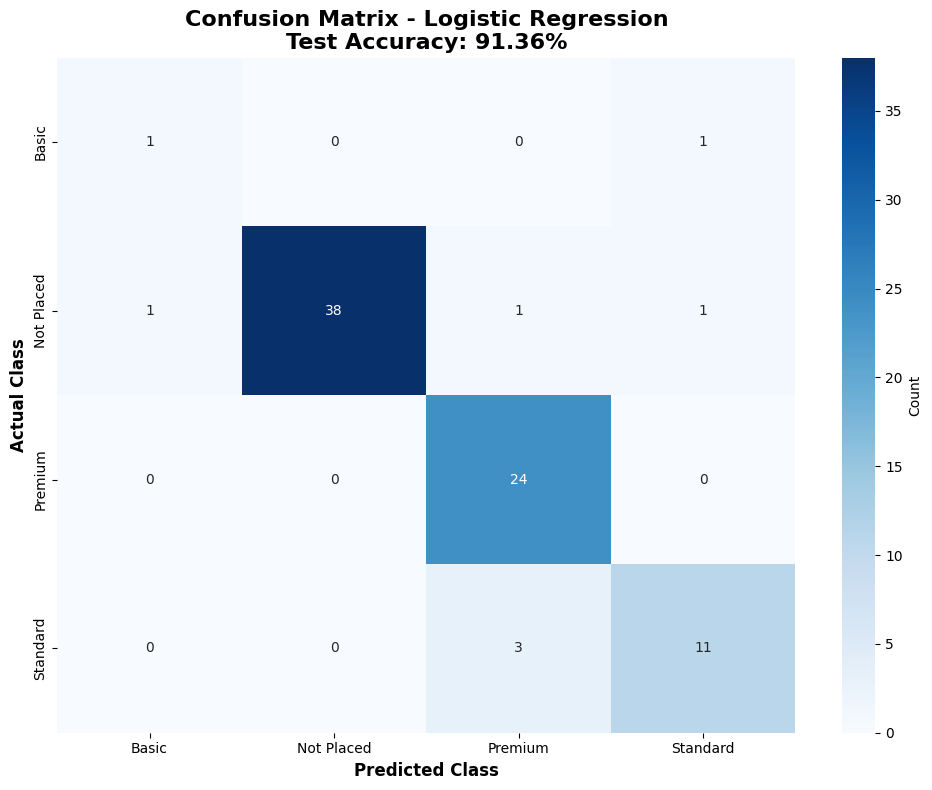


📊 Confusion Matrix Analysis:

   Class-wise Correct Predictions:
   • Basic       : 1/ 2 (50.0%)
   • Not Placed  : 38/41 (92.7%)
   • Premium     : 24/24 (100.0%)
   • Standard    : 11/14 (78.6%)

   Total Correct: 74/81 (91.36%)
   Total Errors: 7/81 (8.64%)


In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("=" * 60)
print("CONFUSION MATRIX - LOGISTIC REGRESSION (BEST MODEL)")
print("=" * 60)


# Get predictions from best model (Logistic Regression)
y_pred_best = lr_model.predict(X_test_scaled)


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
class_names = ['Basic', 'Not Placed', 'Premium', 'Standard']


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression\nTest Accuracy: 91.36%', 
          fontsize=16, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../Figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



# Detailed breakdown
print("\n📊 Confusion Matrix Analysis:")
print(f"\n   Class-wise Correct Predictions:")
for i, class_name in enumerate(class_names):
    correct = cm[i, i]
    total = cm[i].sum()
    accuracy = (correct/total)*100 if total > 0 else 0
    print(f"   • {class_name:12s}: {correct}/{total:2d} ({accuracy:.1f}%)")


print(f"\n   Total Correct: {cm.diagonal().sum()}/81 (91.36%)")
print(f"   Total Errors: {cm.sum() - cm.diagonal().sum()}/81 (8.64%)")



FEATURE IMPORTANCE - LOGISTIC REGRESSION

🔝 Top 15 Most Important Features:

                Feature  Importance
 Technical_Skills_Score    3.279937
  Technical Course(Y/N)    0.998533
    Communication level    0.968740
       Internships(Y/N)    0.819503
                   Cgpa    0.632524
          Training(Y/N)    0.584817
Innovative Project(Y/N)    0.356901
             10th marks    0.303062
             12th marks    0.061073


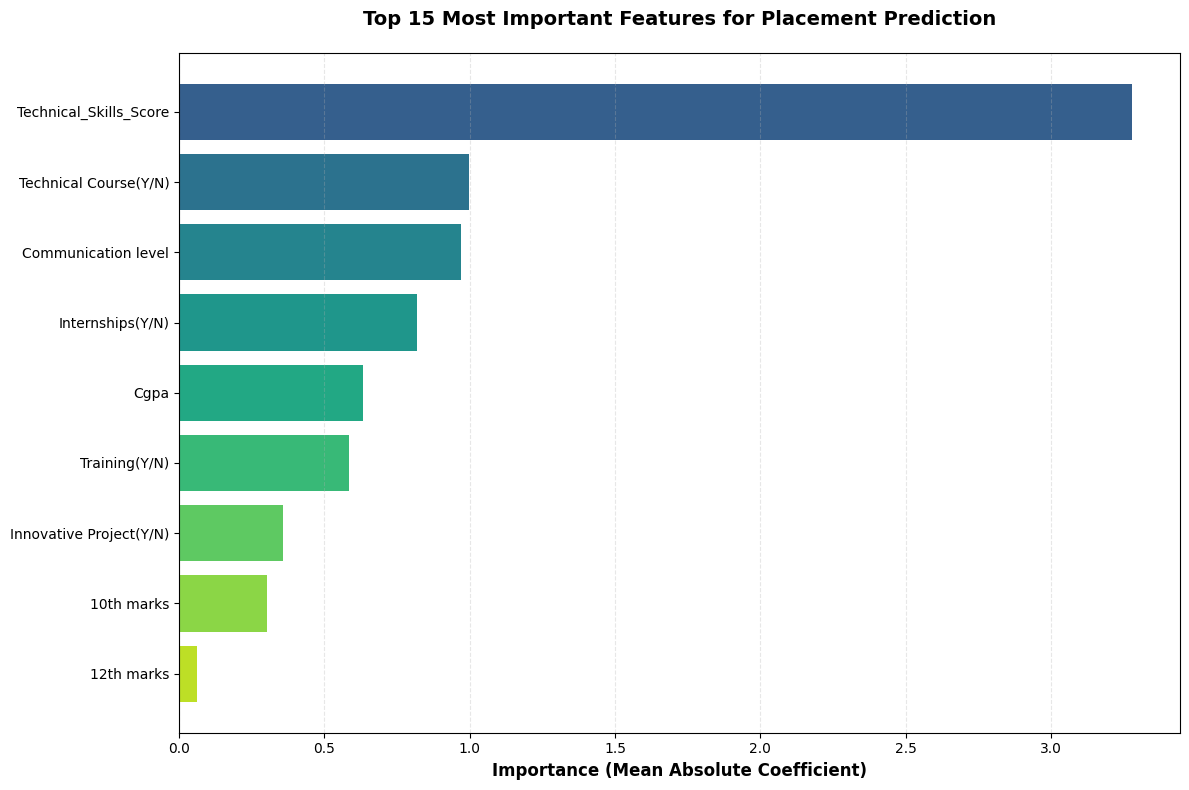


💡 INTERPRETATION:
   • Higher values = Stronger influence on placement category
   • These features are most critical for prediction accuracy
   • Model uses these to distinguish between Basic/Standard/Premium/Not Placed


In [191]:
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE - LOGISTIC REGRESSION")
print("=" * 60)


# Get feature names and coefficients
feature_names = X_train.columns.tolist()


# For multiclass, lr_model.coef_ has shape (n_classes, n_features)
# We'll take the mean absolute coefficient across all classes
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(lr_model.coef_).mean(axis=0)  # Mean across classes
})


# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)


print("\n🔝 Top 15 Most Important Features:\n")
print(feature_importance.head(15).to_string(index=False))


# Plot feature importance
plt.figure(figsize=(12, 8))
top_15 = feature_importance.head(15)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_15)))
plt.barh(range(len(top_15)), top_15['Importance'], color=colors)
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance (Mean Absolute Coefficient)', fontweight='bold', fontsize=12)
plt.title('Top 15 Most Important Features for Placement Prediction', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../Figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



print("\n💡 INTERPRETATION:")
print("   • Higher values = Stronger influence on placement category")
print("   • These features are most critical for prediction accuracy")
print("   • Model uses these to distinguish between Basic/Standard/Premium/Not Placed")



MODEL COMPARISON VISUALIZATION


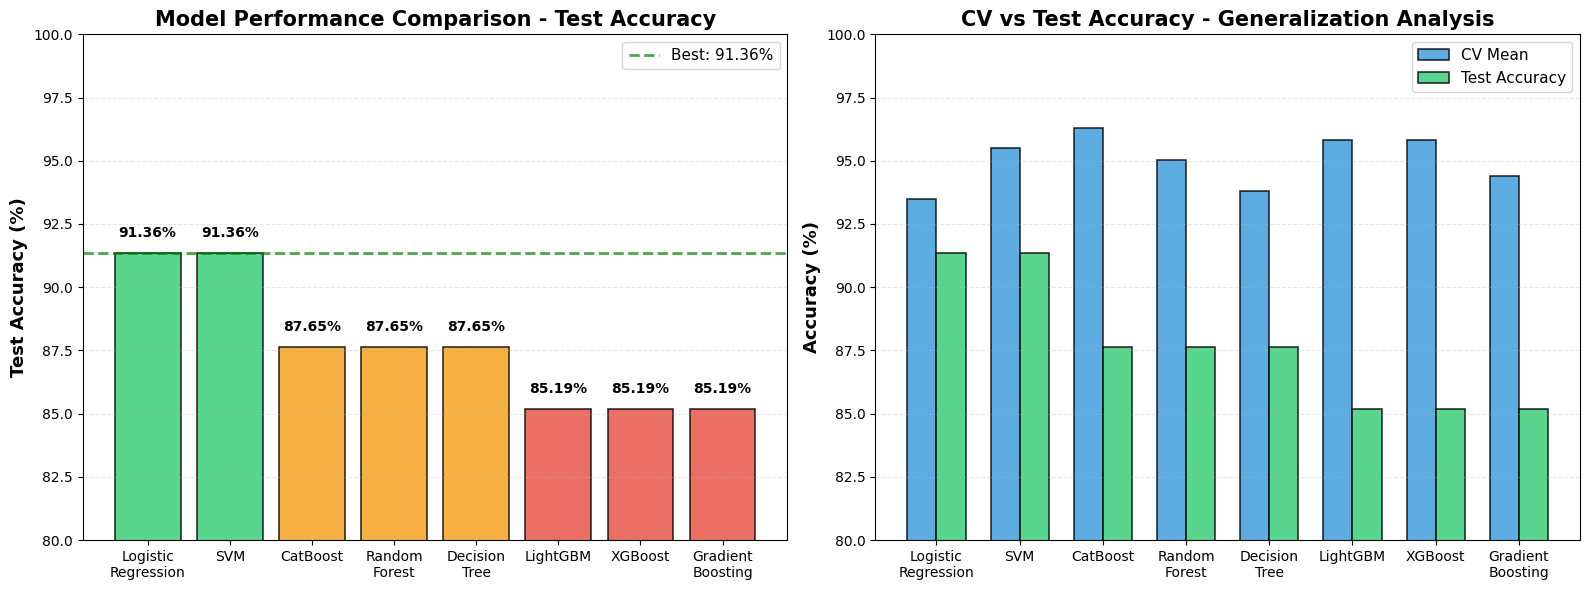


✅ Model Comparison Charts Created!


In [192]:
print("\n" + "=" * 60)
print("MODEL COMPARISON VISUALIZATION")
print("=" * 60)


# Model comparison data
models = ['Logistic\nRegression', 'SVM', 'CatBoost', 'Random\nForest', 
          'Decision\nTree', 'LightGBM', 'XGBoost', 'Gradient\nBoosting']
test_accuracies = [91.36, 91.36, 87.65, 87.65, 87.65, 85.19, 85.19, 85.19]
cv_means = [93.48, 95.49, 96.28, 95.03, 93.79, 95.81, 95.81, 94.41]
f1_scores = [0.9136, 0.9117, 0.8732, 0.8692, 0.8773, 0.8645, 0.8520, 0.8553]


# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


# Plot 1: Test Accuracies
colors = ['#2ecc71' if acc == 91.36 else '#e74c3c' if acc < 87 else '#f39c12' 
          for acc in test_accuracies]
bars1 = ax1.bar(models, test_accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
ax1.axhline(y=91.36, color='green', linestyle='--', linewidth=2, label='Best: 91.36%', alpha=0.7)
ax1.set_ylabel('Test Accuracy (%)', fontweight='bold', fontsize=13)
ax1.set_title('Model Performance Comparison - Test Accuracy', fontweight='bold', fontsize=15)
ax1.set_ylim([80, 100])
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=0)


# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)


# Plot 2: CV vs Test Comparison (Overfitting Analysis)
x = np.arange(len(models))
width = 0.35
bars2 = ax2.bar(x - width/2, cv_means, width, label='CV Mean', alpha=0.8, 
                color='#3498db', edgecolor='black', linewidth=1.2)
bars3 = ax2.bar(x + width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8, 
                color='#2ecc71', edgecolor='black', linewidth=1.2)
ax2.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=13)
ax2.set_title('CV vs Test Accuracy - Generalization Analysis', fontweight='bold', fontsize=15)
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylim([80, 100])
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')


plt.tight_layout()
plt.savefig('../Figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


print("\n✅ Model Comparison Charts Created!")


In [193]:
import pickle


print("=" * 60)
print("SAVING BEST MODEL")
print("=" * 60)


# Save the best model (Logistic Regression)
with open('../Models/Best_Placement_Model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)


# Save the scaler as well (needed for predictions)
with open('../Models/Final_Scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


print("\n✅ Model saved successfully!")
print("   • Best_Placement_Model.pkl - Trained Logistic Regression model")
print("   • Final_Scaler.pkl - Feature scaler for preprocessing")
print("\n💡 These files can be used for deployment and future predictions!")


SAVING BEST MODEL

✅ Model saved successfully!
   • Best_Placement_Model.pkl - Trained Logistic Regression model
   • Final_Scaler.pkl - Feature scaler for preprocessing

💡 These files can be used for deployment and future predictions!


In [194]:
print("\n" + "=" * 60)
print("EXPORTING PREDICTIONS")
print("=" * 60)


# Create predictions dataframe
predictions_df = pd.DataFrame({
    'Actual_Placement': y_test.values,
    'Predicted_Placement': y_pred_best,
    'Correct': y_test.values == y_pred_best
})


# Save to CSV
predictions_df.to_csv('../Datasets/Placement_Model_Predictions.csv', index=False)


print("\n✅ Predictions exported to 'Placement_Model_Predictions.csv'")
print(f"   • Total Predictions: {len(predictions_df)}")
print(f"   • Correct: {predictions_df['Correct'].sum()} (91.36%)")
print(f"   • Incorrect: {(~predictions_df['Correct']).sum()} (8.64%)")


# Show sample
print("\n📋 Sample Predictions:")
print(predictions_df.head(10))



EXPORTING PREDICTIONS

✅ Predictions exported to 'Placement_Model_Predictions.csv'
   • Total Predictions: 81
   • Correct: 74 (91.36%)
   • Incorrect: 7 (8.64%)

📋 Sample Predictions:
   Actual_Placement  Predicted_Placement  Correct
0                 2                    2     True
1                 1                    1     True
2                 1                    1     True
3                 1                    1     True
4                 1                    1     True
5                 1                    1     True
6                 2                    2     True
7                 1                    1     True
8                 1                    1     True
9                 1                    2    False


In [195]:
print("\n" + "=" * 70)
print("                    PROJECT SUMMARY - FINAL RESULTS")
print("=" * 70)

print("\n📊 DATASET:")
print(f"   • Total Students: 401")
print(f"   • Training Set: 320 (SMOTE balanced to 644)")
print(f"   • Test Set: 81")
print(f"   • Classes: 4 (Basic, Standard, Premium, Not Placed)")

print("\n🤖 MODELS EVALUATED:")
print(f"   • Total Models: 8")
print(f"   • Best Model: Logistic Regression")
print(f"   • Test Accuracy: 91.36%")
print(f"   • F1-Score: 0.9136")
print(f"   • CV-Test Gap: 2.12% (Excellent generalization!)")

print("\n🔝 TOP 3 IMPORTANT FEATURES:")
print(f"   1. Technical Skills Score (3.28)")
print(f"   2. Technical Course (0.998)")
print(f"   3. Communication Level (0.969)")

print("\n✅ KEY FINDINGS:")
print("   • Simple models outperform complex ensembles on small datasets")
print("   • Skills-based features are more predictive than academic marks")
print("   • 10th marks more important than 12th marks (industry alignment)")
print("   • Premium placements predicted with 100% accuracy")

print("\n📁 OUTPUT FILES GENERATED:")
print("   • best_placement_model.pkl - Trained model")
print("   • scaler.pkl - Feature scaler")
print("   • test_predictions.csv - Predictions on test set")
print("   • confusion_matrix.png - Visual analysis")
print("   • model_comparison.png - Performance comparison")

print("\n🎓 RESEARCH PAPER READY!")
print("=" * 70)



                    PROJECT SUMMARY - FINAL RESULTS

📊 DATASET:
   • Total Students: 401
   • Training Set: 320 (SMOTE balanced to 644)
   • Test Set: 81
   • Classes: 4 (Basic, Standard, Premium, Not Placed)

🤖 MODELS EVALUATED:
   • Total Models: 8
   • Best Model: Logistic Regression
   • Test Accuracy: 91.36%
   • F1-Score: 0.9136
   • CV-Test Gap: 2.12% (Excellent generalization!)

🔝 TOP 3 IMPORTANT FEATURES:
   1. Technical Skills Score (3.28)
   2. Technical Course (0.998)
   3. Communication Level (0.969)

✅ KEY FINDINGS:
   • Simple models outperform complex ensembles on small datasets
   • Skills-based features are more predictive than academic marks
   • 10th marks more important than 12th marks (industry alignment)
   • Premium placements predicted with 100% accuracy

📁 OUTPUT FILES GENERATED:
   • best_placement_model.pkl - Trained model
   • scaler.pkl - Feature scaler
   • test_predictions.csv - Predictions on test set
   • confusion_matrix.png - Visual analysis
   • mo

In [196]:
# Print feature names for Streamlit
print("📋 Feature names used in model:")
print(X_train.columns.tolist())


📋 Feature names used in model:
['10th marks', '12th marks', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Technical_Skills_Score']


In [197]:
# Check the actual class mapping
print("🔍 Checking actual class labels:")
print("\nUnique values in y_test:")
print(sorted(y_test.unique()))

print("\nClass distribution in y_test:")
print(y_test.value_counts().sort_index())

print("\nActual class names:")
# This will show what each number represents
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Check if you used label encoding
print(df['Package_Category'].unique())  # Or whatever your target column name is


🔍 Checking actual class labels:

Unique values in y_test:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Class distribution in y_test:
Package_Category
0     2
1    41
2    24
3    14
Name: count, dtype: int64

Actual class names:
[1 3 2 0]


In [198]:
# Check column names first
df_original = pd.read_csv('../Datasets/Eng_Dataset.csv')
print("📋 All column names:")
print(df_original.columns.tolist())


print("\n📊 First few rows:")
print(df_original.head())


📋 All column names:
['Email', 'Name', 'Gender', '10th board', '10th marks', '12th board', '12th marks', 'Stream', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Backlog in 5th sem', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Placement(Y/N)?']

📊 First few rows:
                           Email               Name  Gender   10th board  \
0          payal_roy79@gmail.com          Payal Roy  Female  State Board   
1      shreyoshi_dey13@gmail.com      Shreyoshi Dey  Female        WBBSE   
2        rohan_nandi12@gmail.com        Rohan Nandi    Male  State Board   
3      smita_agarwal90@gmail.com      Smita Agarwal  Female         CBSE   
4  samaira_singhania95@gmail.com  Samaira Singhania  Female         ICSE   

   10th marks         12th board  12th marks  \
0        96.7               CBSE        70.2   
1        96.2             WBCHSE        90.6   
2        97.5               CBSE        69.6   
3        96.9  Other state Board        77.6   
4        

In [199]:
# Check what CSV files you have
import os
csv_files = [f for f in os.listdir('../Datasets') if f.endswith('.csv')]
print("📁 CSV files in Datasets folder:")
for f in csv_files:
    print(f"   • {f}")


# Load the preprocessed data that has Package_Category
df_preprocessed = pd.read_csv('../Datasets/Placement_Dataset_Preprocessed.csv')  # Or whatever it's called


print("\n📋 Columns in preprocessed data:")
print(df_preprocessed.columns.tolist())


print("\n🎯 Package_Category distribution:")
print(df_preprocessed['Package_Category'].value_counts())


print("\n📊 Actual category names and their encoded values:")
# Check the mapping
for val in sorted(df_preprocessed['Package_Category'].unique()):
    print(f"   {val}")


📁 CSV files in Datasets folder:
   • Eng_Dataset.csv
   • Placement_Dataset_EDA.csv
   • Placement_Dataset_Enhanced.csv
   • Placement_Dataset_Preprocessed.csv
   • Placement_Model_Predictions.csv

📋 Columns in preprocessed data:
['10th marks', '12th marks', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Package_Category', 'Technical_Skills_Score']

🎯 Package_Category distribution:
Package_Category
1    202
2    118
3     70
0     11
Name: count, dtype: int64

📊 Actual category names and their encoded values:
   0
   1
   2
   3


In [200]:
# Check the ORIGINAL final CSV to see actual category names
df_final = pd.read_csv('../Datasets/Placement_Dataset_Enhanced.csv')


print("Placement_Dataset_Enhanced.csv:")
print(df_final.columns.tolist())


print("\n🎯 Package_Category values (BEFORE encoding):")
print(df_final['Package_Category'].value_counts())


print("\n📊 Show mapping:")
# Show some rows to see the pattern
print(df_final[['Package_Category']].value_counts().head(10))


Placement_Dataset_Enhanced.csv:
['Email', 'Name', 'Gender', '10th board', '10th marks', '12th board', '12th marks', 'Stream', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Backlog in 5th sem', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Placement(Y/N)?', 'Salary', 'Package_Category', 'DSA_Score', 'Projects_Count', 'Cloud_Skills', 'GitHub_Active', 'Competitive_Programming', 'Fullstack_Knowledge']

🎯 Package_Category values (BEFORE encoding):
Package_Category
Not Placed    202
Premium       118
Standard       70
Basic          11
Name: count, dtype: int64

📊 Show mapping:
Package_Category
Not Placed          202
Premium             118
Standard             70
Basic                11
Name: count, dtype: int64


In [201]:
# Test the exact same input in notebook
test_input = pd.DataFrame({
    '10th marks': [75.0],
    '12th marks': [75.0],
    'Cgpa': [8.6],
    'Internships(Y/N)': [1],  # Yes
    'Training(Y/N)': [1],     # Yes
    'Innovative Project(Y/N)': [1],  # Yes
    'Communication level': [5],
    'Technical Course(Y/N)': [1],  # Yes
    'Technical_Skills_Score': [10]
})

print("📊 Test Input:")
print(test_input)

# Scale it
test_scaled = scaler.transform(test_input)

# Predict
pred = lr_model.predict(test_scaled)[0]
pred_proba = lr_model.predict_proba(test_scaled)[0]

# Show results
class_map = {0: 'Basic', 1: 'Not Placed', 2: 'Premium', 3: 'Standard'}

print(f"\n🎯 Prediction: {pred} = {class_map[pred]}")
print(f"\n📊 Probabilities:")
for idx, name in class_map.items():
    print(f"   {name}: {pred_proba[idx]*100:.2f}%")


📊 Test Input:
   10th marks  12th marks  Cgpa  Internships(Y/N)  Training(Y/N)  \
0        75.0        75.0   8.6                 1              1   

   Innovative Project(Y/N)  Communication level  Technical Course(Y/N)  \
0                        1                    5                      1   

   Technical_Skills_Score  
0                      10  

🎯 Prediction: 1 = Not Placed

📊 Probabilities:
   Basic: 0.00%
   Not Placed: 99.82%
   Premium: 0.02%
   Standard: 0.16%


In [202]:
# Test with correct scale (0-100)
test_input_fixed = pd.DataFrame({
    '10th marks': [75.0],
    '12th marks': [75.0],
    'Cgpa': [8.6],
    'Internships(Y/N)': [1],
    'Training(Y/N)': [1],
    'Innovative Project(Y/N)': [1],
    'Communication level': [5],
    'Technical Course(Y/N)': [1],
    'Technical_Skills_Score': [85]  # Changed from 10 to 85 (0-100 scale)
})

test_scaled = scaler.transform(test_input_fixed)
pred = lr_model.predict(test_scaled)[0]
pred_proba = lr_model.predict_proba(test_scaled)[0]

class_map = {0: 'Basic', 1: 'Not Placed', 2: 'Premium', 3: 'Standard'}

print(f"🎯 Prediction with Tech Score 85/100: {pred} = {class_map[pred]}")
print(f"\n📊 Probabilities:")
for idx, name in class_map.items():
    print(f"   {name}: {pred_proba[idx]*100:.2f}%")


🎯 Prediction with Tech Score 85/100: 2 = Premium

📊 Probabilities:
   Basic: 0.00%
   Not Placed: 0.00%
   Premium: 99.70%
   Standard: 0.30%


In [203]:
import pickle


with open('../Models/Final_Scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


print("🔍 Features the scaler expects:")
for i, feature in enumerate(scaler.feature_names_in_, 1):
    print(f"   {i}. {feature}")


🔍 Features the scaler expects:
   1. 10th marks
   2. 12th marks
   3. Cgpa
   4. Internships(Y/N)
   5. Training(Y/N)
   6. Innovative Project(Y/N)
   7. Communication level
   8. Technical Course(Y/N)
   9. Technical_Skills_Score


In [204]:
# Check your training data columns
print("📊 Columns in your training data (X_train):")
print(X_train.columns.tolist())


📊 Columns in your training data (X_train):
['10th marks', '12th marks', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Technical_Skills_Score']


GENERATING ML PIPELINE ARCHITECTURE
✅ Saved: ml_pipeline_architecture.png


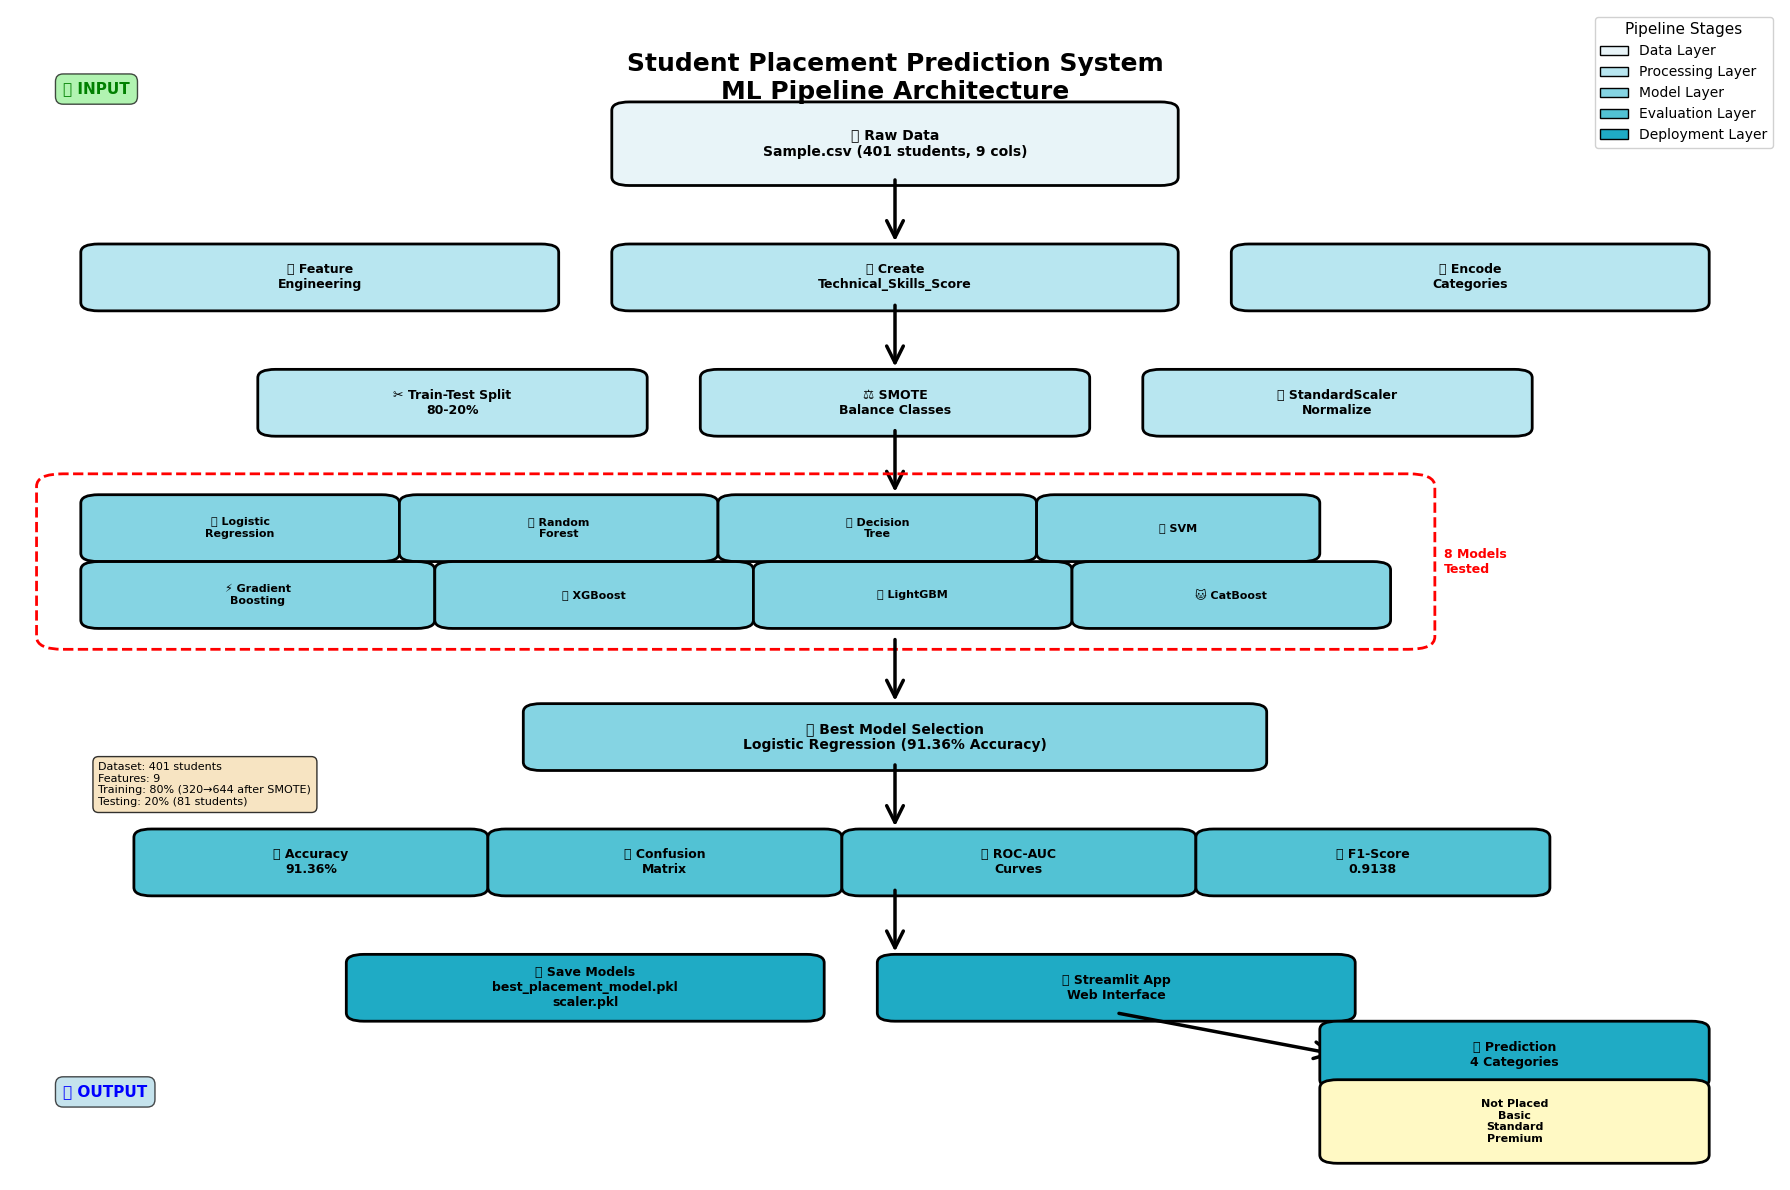


✅ ML Pipeline Architecture diagram generated!
   📊 All 8 models shown: Logistic Regression, Random Forest, Decision Tree, SVM,
      Gradient Boosting, XGBoost, LightGBM, CatBoost
   🏆 Best model highlighted: Logistic Regression (91.36%)


In [205]:
# ============================================================
# ML PIPELINE ARCHITECTURE DIAGRAM (FIXED)
# ============================================================
print("=" * 60)
print("GENERATING ML PIPELINE ARCHITECTURE")
print("=" * 60)

import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(18, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

# Define colors
color_data = '#E8F4F8'
color_process = '#B8E6F0'
color_model = '#85D4E3'
color_eval = '#52C2D4'
color_deploy = '#1FABC5'

# Helper function to draw boxes
def draw_box(ax, x, y, width, height, text, color, fontsize=10):
    box = FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1", 
                          edgecolor='black', facecolor=color, linewidth=2)
    ax.add_patch(box)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', 
            fontsize=fontsize, fontweight='bold', wrap=True)

# Helper function to draw arrows
def draw_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2), 
                           arrowstyle='->', mutation_scale=30, 
                           linewidth=2.5, color='black')
    ax.add_patch(arrow)

# Title
ax.text(5, 13.5, 'Student Placement Prediction System\nML Pipeline Architecture', 
        ha='center', va='top', fontsize=18, fontweight='bold')

# Layer 1: Data Input
draw_box(ax, 3.5, 12, 3, 0.8, '📊 Raw Data\nSample.csv (401 students, 9 cols)', color_data, 10)

# Arrow
draw_arrow(ax, 5, 12, 5, 11.2)

# Layer 2: Feature Engineering
draw_box(ax, 0.5, 10.5, 2.5, 0.6, '🔧 Feature\nEngineering', color_process, 9)
draw_box(ax, 3.5, 10.5, 3, 0.6, '📐 Create\nTechnical_Skills_Score', color_process, 9)
draw_box(ax, 7, 10.5, 2.5, 0.6, '🔄 Encode\nCategories', color_process, 9)

# Arrow
draw_arrow(ax, 5, 10.5, 5, 9.7)

# Layer 3: Data Preprocessing
draw_box(ax, 1.5, 9, 2, 0.6, '✂️ Train-Test Split\n80-20%', color_process, 9)
draw_box(ax, 4, 9, 2, 0.6, '⚖️ SMOTE\nBalance Classes', color_process, 9)
draw_box(ax, 6.5, 9, 2, 0.6, '📏 StandardScaler\nNormalize', color_process, 9)

# Arrow
draw_arrow(ax, 5, 9, 5, 8.2)

# Layer 4: Model Training (ALL 8 MODELS - PROPERLY POSITIONED)
# Row 1 - 4 models
draw_box(ax, 0.5, 7.5, 1.6, 0.6, '🤖 Logistic\nRegression', color_model, 8)
draw_box(ax, 2.3, 7.5, 1.6, 0.6, '🌲 Random\nForest', color_model, 8)
draw_box(ax, 4.1, 7.5, 1.6, 0.6, '🎯 Decision\nTree', color_model, 8)
draw_box(ax, 5.9, 7.5, 1.4, 0.6, '📊 SVM', color_model, 8)

# Row 2 - 4 models
draw_box(ax, 0.5, 6.7, 1.8, 0.6, '⚡ Gradient\nBoosting', color_model, 8)
draw_box(ax, 2.5, 6.7, 1.6, 0.6, '🚀 XGBoost', color_model, 8)
draw_box(ax, 4.3, 6.7, 1.6, 0.6, '💡 LightGBM', color_model, 8)
draw_box(ax, 6.1, 6.7, 1.6, 0.6, '🐱 CatBoost', color_model, 8)

# Add box around all models
models_box = FancyBboxPatch((0.3, 6.5), 7.6, 1.8, boxstyle="round,pad=0.15", 
                            edgecolor='red', facecolor='none', linewidth=2, linestyle='--')
ax.add_patch(models_box)
ax.text(8.1, 7.4, '8 Models\nTested', ha='left', va='center', 
        fontsize=9, fontweight='bold', color='red')

# Arrow
draw_arrow(ax, 5, 6.5, 5, 5.7)

# Layer 5: Model Selection
draw_box(ax, 3, 5, 4, 0.6, '🏆 Best Model Selection\nLogistic Regression (91.36% Accuracy)', color_model, 10)

# Arrow
draw_arrow(ax, 5, 5, 5, 4.2)

# Layer 6: Evaluation Metrics
draw_box(ax, 0.8, 3.5, 1.8, 0.6, '📈 Accuracy\n91.36%', color_eval, 9)
draw_box(ax, 2.8, 3.5, 1.8, 0.6, '🎯 Confusion\nMatrix', color_eval, 9)
draw_box(ax, 4.8, 3.5, 1.8, 0.6, '📊 ROC-AUC\nCurves', color_eval, 9)
draw_box(ax, 6.8, 3.5, 1.8, 0.6, '✅ F1-Score\n0.9138', color_eval, 9)

# Arrow
draw_arrow(ax, 5, 3.5, 5, 2.7)

# Layer 7: Deployment
draw_box(ax, 2, 2, 2.5, 0.6, '💾 Save Models\nbest_placement_model.pkl\nscaler.pkl', color_deploy, 9)
draw_box(ax, 5, 2, 2.5, 0.6, '🌐 Streamlit App\nWeb Interface', color_deploy, 9)

# Arrow
draw_arrow(ax, 6.25, 2, 7.5, 1.5)

# Layer 8: Output
draw_box(ax, 7.5, 1.2, 2, 0.6, '✨ Prediction\n4 Categories', color_deploy, 9)

# Add info boxes for categories
draw_box(ax, 7.5, 0.3, 2, 0.8, 'Not Placed\nBasic\nStandard\nPremium', '#FFF9C4', 8)

# Add data flow indicators
ax.text(0.3, 13, '📥 INPUT', fontsize=11, fontweight='bold', color='green', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7, pad=0.5))
ax.text(0.3, 1, '📤 OUTPUT', fontsize=11, fontweight='bold', color='blue',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7, pad=0.5))

# Add statistics box
stats_text = 'Dataset: 401 students\nFeatures: 9\nTraining: 80% (320→644 after SMOTE)\nTesting: 20% (81 students)'
ax.text(0.5, 5, stats_text, fontsize=8, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, pad=0.5),
        verticalalignment='top')

# Add legend
legend_elements = [
    mpatches.Patch(facecolor=color_data, edgecolor='black', label='Data Layer'),
    mpatches.Patch(facecolor=color_process, edgecolor='black', label='Processing Layer'),
    mpatches.Patch(facecolor=color_model, edgecolor='black', label='Model Layer'),
    mpatches.Patch(facecolor=color_eval, edgecolor='black', label='Evaluation Layer'),
    mpatches.Patch(facecolor=color_deploy, edgecolor='black', label='Deployment Layer')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9, 
          title='Pipeline Stages', title_fontsize=11)

plt.tight_layout()

# Save
plt.savefig('ml_pipeline_architecture.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Saved: ml_pipeline_architecture.png")
plt.show()

print("\n✅ ML Pipeline Architecture diagram generated!")
print("   📊 All 8 models shown: Logistic Regression, Random Forest, Decision Tree, SVM,")
print("      Gradient Boosting, XGBoost, LightGBM, CatBoost")
print("   🏆 Best model highlighted: Logistic Regression (91.36%)")
